In [284]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
#
import scienceplots
from cmap import Colormap
from matplotlib.gridspec import GridSpec
from PIL import Image

In [3]:
plt.style.use(['science', 'grid'])

In [425]:
df = pd.read_csv("data_pattern.csv").drop(columns=["index"])
print(df)
# Restrict to test and val phases.
df = df.loc[df.phase.str.match('(test|val)')]
# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()
print(df_num)
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

        Unnamed: 0    code       group             seed phase  epoch      ZMCC
0                0  100179    I -4 3 m  pattern_random0  test     10  0.933387
1                1  100202      P a -3  pattern_random0  test     10  0.981541
2                2  100547  F d -3 m Z  pattern_random0  test     10  0.999392
3                3  100569       I 2 3  pattern_random0  test     10  0.930508
4                4  100614    I a -3 d  pattern_random0  test     10  0.987923
...            ...     ...         ...              ...   ...    ...       ...
747235      747235   99181  F d -3 m Z  pattern_random9   val     80  0.999884
747236      747236   99346    F m -3 c  pattern_random9   val     80  0.980897
747237      747237   99458  F d -3 m Z  pattern_random9   val     80  0.999355
747238      747238   99758  F d -3 m Z  pattern_random9   val     80  0.989222
747239      747239    9979  F d -3 m Z  pattern_random9   val     80  0.999819

[747240 rows x 7 columns]
         code     Unnamed

In [ ]:
print(df_num)

         code     Unnamed: 0         index  epoch      ZMCC
0          16  113532.000000   1446.000000  100.0  0.933486
1          25  218509.000000  69061.000000  100.0  0.995315
2          93  372321.500000  36063.500000  100.0  0.991399
3         119  369920.666667  46116.666667  100.0  0.953942
4         121  146992.500000  34906.500000  100.0  0.960200
...       ...            ...           ...    ...       ...
11059  759462  423222.666667  24694.666667  100.0  0.996640
11060  759650  450604.000000   2260.000000  100.0  0.999838
11061  759651  446871.500000  35889.500000  100.0  0.999710
11062  759652  558973.500000  35905.500000  100.0  0.998746
11063  760017  405782.500000  69524.500000  100.0  0.998836

[11064 rows x 5 columns]


In [ ]:
groups = sorted(df.group.unique())
n = 21
groups_losses = {group: [0] * n for group in groups}
for index, row in df_num.iterrows():
    group = space_groups[int(row["code"])]
    ZMCC = row["ZMCC"]
    # print(np.linspace(0, 1, n))
    ee = 1/(n-1)
    for i, e in enumerate(np.linspace(0, 1, n)):
        if ZMCC <= e + ee:
            print(ZMCC, i)
            groups_losses[group][i] += 1
            break

0.9334860477635923 18
0.9953150353597876 19
0.9913991520764681 19
0.9539422019773466 19
0.9602000582223807 19
0.990719736229049 19
0.9918141001069152 19
0.9955525936446872 19
0.9554834649304584 19
0.935294321611913 18
0.6454477896356335 12
0.737834422017354 14
0.8749437287246257 17
0.933893803002016 18
0.5839039838904561 11
0.997845217794827 19
0.592676776319322 11
0.9982242125990551 19
0.9994492714894644 19
0.8507252875355155 17
0.7801580672822233 15
0.8701248344349971 17
0.9924600272183404 19
0.7630963941348748 15
0.3629966193436048 7
0.3888918517848498 7
0.8428534019348326 16
0.9817294982660248 19
0.9976537003397785 19
0.9981963644636442 19
0.9968542277492345 19
0.996981376221483 19
0.9975581384404758 19
0.994406500232336 19
0.9952551473679927 19
0.9612428483363945 19
0.9035316635346872 18
0.8616791109167681 17
0.9985675839832717 19
0.9991906516077563 19
0.9961497172267277 19
0.8656898513786231 17
0.949412840151918 18
0.9985466936620218 19
0.9987826062056011 19
0.9454113754162717 18

In [ ]:
# print(groups_losses)

sg = pd.read_csv("space_groups.csv", index_col="ICSD_code").value_counts()
# print(sg)

for group in groups:
    groups_losses[group] = np.array(groups_losses[group])
    groups_losses[group] = groups_losses[group] / np.sum(groups_losses[group])
    groups_losses[group] *= sg[group]

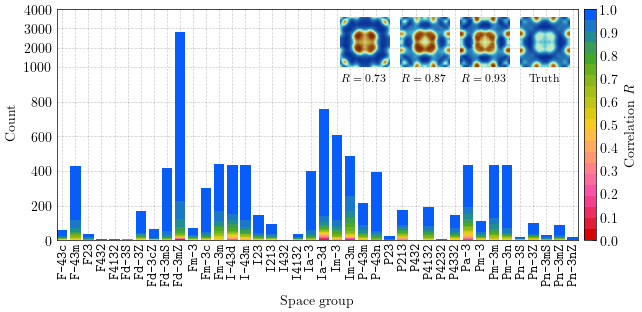

In [435]:
fig = plt.figure(figsize=(8, 3))#, dpi=2000)
gs = GridSpec(2, 1, height_ratios=[1, 3])

# fig, axes = plt.subplots(2, 1, figsize=(7.5, 2.5))
top_ax = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])
fig.subplots_adjust(hspace=0)


# pparam = dict(xlabel=r'space group', ylabel=r'count')
pparam = dict(ylim=[0, 1000])
top_pparam = dict(ylim=[1000, 4000])

ax.minorticks_off()
ax.grid(alpha=0.2)
ax.margins(0, 0)
ax.tick_params(length=0, labelbottom=False)
top_ax.minorticks_off()
top_ax.grid(alpha=0.2)
top_ax.margins(0, 0)
top_ax.tick_params(length=0, labelbottom=False)
top_ax.set_yticks([2000, 3000, 4000])
ax.set(**pparam)
top_ax.set(**top_pparam)

top_ax.spines[['bottom']].set_visible(False)
ax.spines[['top']].set_visible(False)

# c1 = Colormap("cmap:green").to_mpl()(np.linspace(0., 1, 128))
# c2 = Colormap("cmap:cyan").to_mpl()(np.linspace(0., 1, 128))
# colors = np.vstack((c2, c1))
# c = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)
# c = Colormap("crameri:berlin_r")
# cmap = Colormap(lambda x: c(np.sign(x-0.5) * 8 * (x-0.5)**4 + 0.5)).to_mpl()
# cmap = Colormap(lambda x: c(x)).to_mpl()

# cmap = Colormap(["#d73027", (0.3, "k"), (0.7, "k"), "#4daf4a"]).to_mpl()
cmap = Colormap("colorcet:cet_r3_r").to_mpl()

inside_colors = [cmap(i) for i in np.linspace(0, 1, n-1)]
colors = [cmap(i) for i in np.linspace(0, 1, n)]
bottom=np.zeros(len(groups))

for i in range(n-1):
    weights = [groups_losses[group][i] for l, group in enumerate(groups)]
    p = ax.bar(groups, weights, 0.8, bottom=bottom, color=inside_colors[i], align="center", rasterized=True)
    p = top_ax.bar(groups, weights, 0.8, bottom=bottom, color=inside_colors[i], align="center", rasterized=True)
    bottom += weights

# cax, kw = mpl.colorbar.make_axes([top_ax, ax])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(0, 1, n + 1), cmap.N), cmap=cmap),
    ax=[top_ax, ax], pad=0.01, ticks=np.linspace(0, 1, 11), location="right")
cbar.solids.set_rasterized(True)
ax.text(43, 660, "Correlation $R$", rotation=90, verticalalignment="center")

for i, group in enumerate(groups):
    # t = f"$\\texttt{group.replace(" ", "")}$"
    t = r"$\texttt{{{0}}}$".format(group.replace(" ", ""))
    ax.text(i, -15, t, rotation=90, verticalalignment="top", horizontalalignment="center", fontsize=10)
ax.text(19.5, -350, "Space group", verticalalignment="center", horizontalalignment="center")
# ax.set_xticklabels(ticks)
fig.text(0.06, 0.5, 'Count', va='center', rotation='vertical')

im1 = Image.open("153466/9_100_0.72888.png")
im1 = im1.resize((50, 50))
fig.figimage(im1, 340, 245, zorder=10)
fig.text(0.48, 0.64, '$R=0.73$', fontsize=8)
im2 = Image.open("153466/2_100_0.87034.png")
im2 = im2.resize((50, 50))
fig.figimage(im2, 400, 245, zorder=10)
fig.text(0.555, 0.64, '$R=0.87$', fontsize=8)
im3 = Image.open("153466/0_100_0.92939.png")
im3 = im3.resize((50, 50))
fig.figimage(im3, 460, 245, zorder=10)
fig.text(0.630, 0.64, '$R=0.93$', fontsize=8)
im4 = Image.open("153466/real.png")
im4 = im4.resize((50, 50))
fig.figimage(im4, 520, 245, zorder=10)
# fig.text(0.705, 0.64, 'Truth', fontsize=8)
fig.text(0.715, 0.64, 'Truth', fontsize=8)

fig.savefig("figures/group_correlations.pdf", format="pdf")

bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
# print(width, height)
# fig.savefig("figures/group_correlations.png", dpi=2000)